In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df=pd.read_csv('Health_Sleep_Statistics.csv')

In [96]:
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [97]:
df.size

1200

In [98]:
df.columns.size

12

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [100]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [101]:
df.isna().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

In [102]:
df.duplicated().sum()

0

In [103]:
df.drop(['User ID'],axis=1, inplace=True)

In [104]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


Age vs Sleep Quality Analysis

In [105]:
age_sleep_quality_corr=df[['Age','Sleep Quality']].corr()


In [106]:
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [107]:
age_sleep_quality_corr['Age']

Age              1.000000
Sleep Quality   -0.848356
Name: Age, dtype: float64

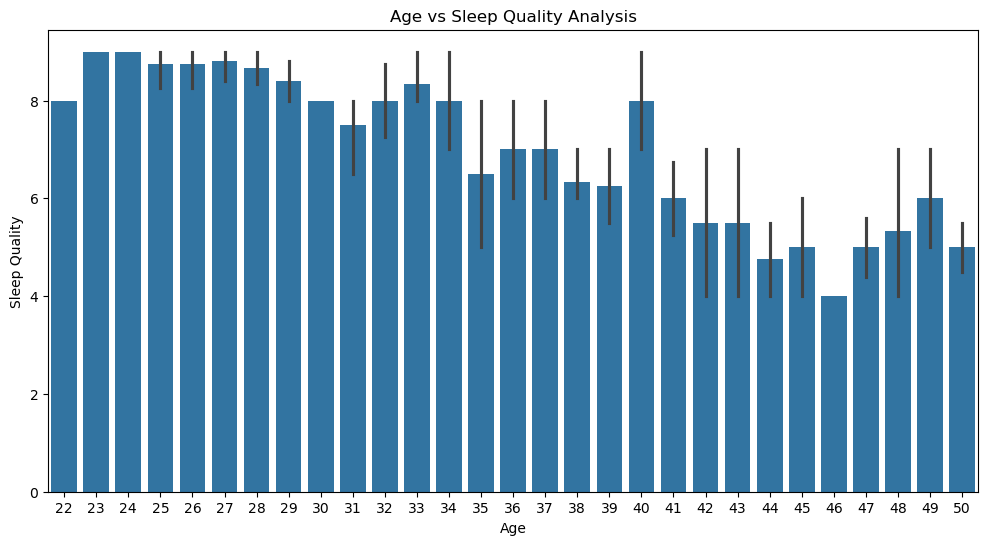

In [108]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age',y='Sleep Quality', data=df)
plt.title('Age vs Sleep Quality Analysis')
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

In [109]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model=LinearRegression()

x=df[['Age']]
y=df[['Sleep Quality']]

age_sleep_quality_model.fit(x,y)

LinearRegression()

In [110]:
age_sleep_quality_model.intercept_


array([13.26881202])

In [111]:
age_sleep_quality_model.coef_

array([[-0.17408531]])

In [112]:
age_sleep_quality_predictions = age_sleep_quality_model.predict(x)

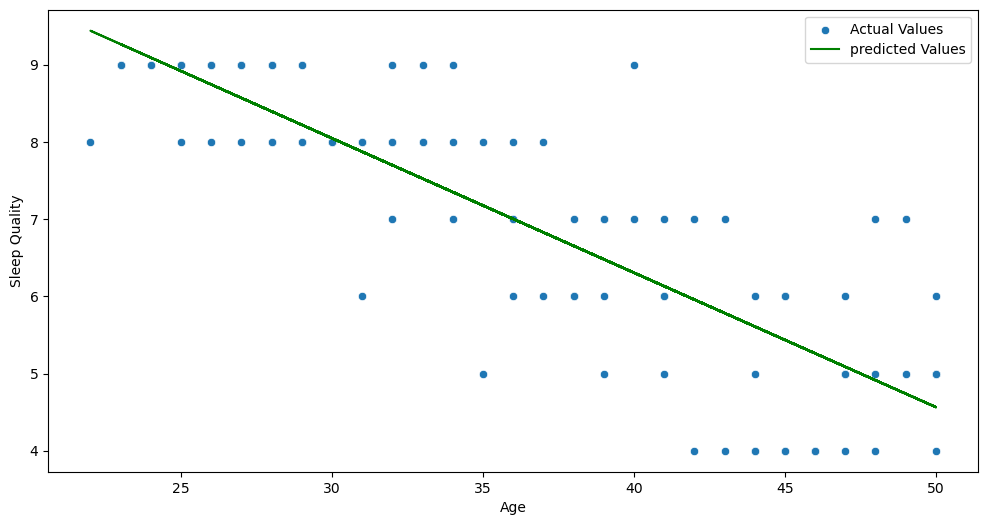

In [113]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Age" ,y= "Sleep Quality",data=df, label="Actual Values")
plt.plot(x, age_sleep_quality_predictions ,color='green',label="predicted Values")
plt.legend()
plt.show()

Physical Activity vs Sleep Quality

In [114]:
df['Physical Activity Level'].head()

0    medium
1       low
2      high
3       low
4      high
Name: Physical Activity Level, dtype: object

In [115]:
df['Sleep Quality'].head()

0    8
1    7
2    9
3    5
4    8
Name: Sleep Quality, dtype: int64

In [116]:
df['Gender'].head()

0    f
1    m
2    f
3    m
4    f
Name: Gender, dtype: object

<Axes: xlabel='Gender', ylabel='Sleep Quality'>

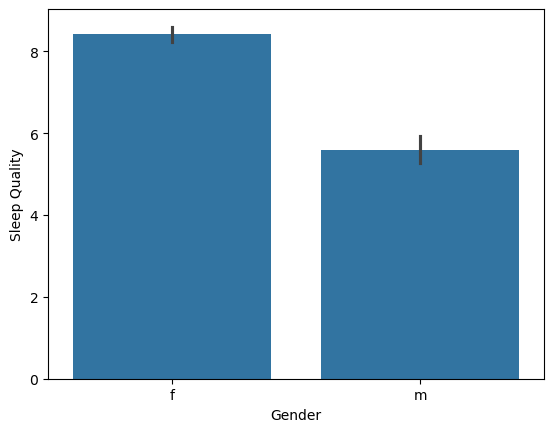

In [117]:
sns.barplot(x='Gender',y='Sleep Quality',data=df)

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

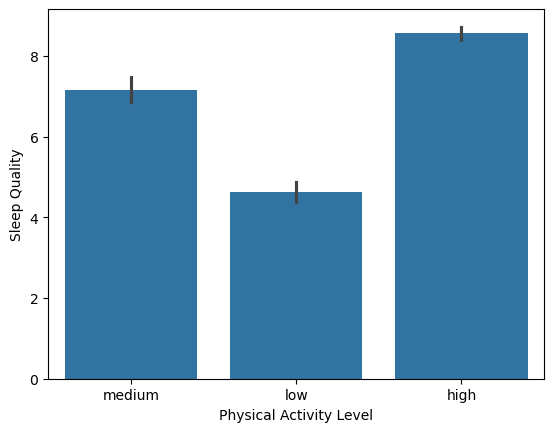

In [118]:
sns.barplot(x='Physical Activity Level',y='Sleep Quality',data=df)


In [119]:
custom_codes = {'low': 1, 'medium': 2, 'high': 3}
df['Physical Activity Level'] = df['Physical Activity Level'].map(custom_codes)
df["Physical Activity Level"].head()

0    2
1    1
2    3
3    1
4    3
Name: Physical Activity Level, dtype: int64

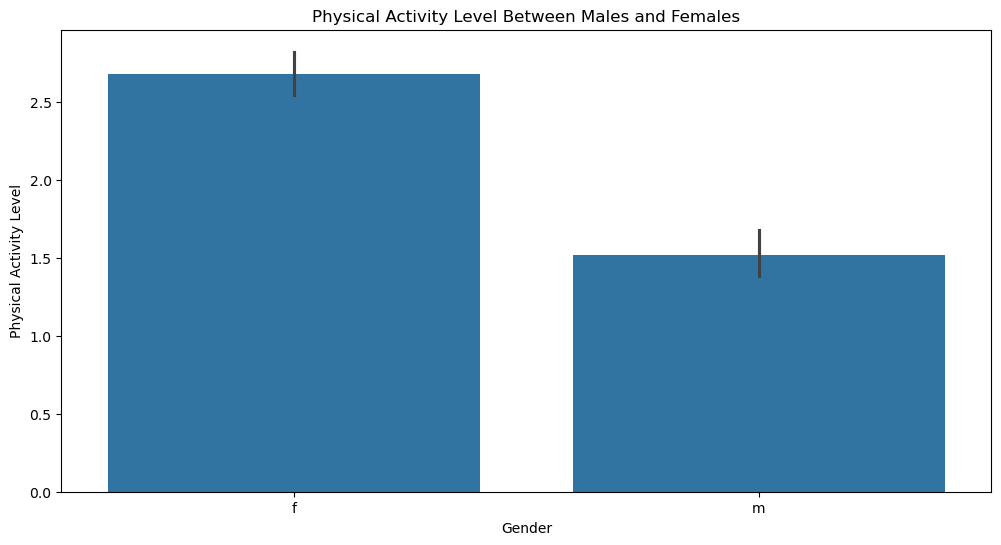

In [120]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Physical Activity Level', data=df)
plt.title('Physical Activity Level Between Males and Females')
plt.xlabel('Gender')
plt.ylabel('Physical Activity Level')
plt.show()

In [121]:
from scipy import stats

sleep_quality_males = df[df['Gender'] == 'm']['Sleep Quality']
sleep_quality_females = df[df['Gender'] == 'f']['Sleep Quality']

t_sleep_quality, p_sleep_quality = stats.ttest_ind(sleep_quality_males, sleep_quality_females,  nan_policy='omit')


physical_activity_males = df[df['Gender'] == 'm']['Physical Activity Level']
physical_activity_females = df[df['Gender'] == 'f']['Physical Activity Level']

t_physical_activity, p_physical_activity = stats.ttest_ind(physical_activity_males, physical_activity_females, nan_policy='omit')

In [122]:
print(f"t-sleep-quality  + {t_sleep_quality:.2f}")
print(f"p-sleep-quality  + {p_sleep_quality:.2f}")
print(f"t-physical_activity  + {t_physical_activity:.2f}")
print(f"p-physical_activity  + {p_physical_activity:.2f}")

t-sleep-quality  + -14.32
p-sleep-quality  + 0.00
t-physical_activity  + -10.98
p-physical_activity  + 0.00


In [123]:
def sleep_duration_hours_helper_function(str_time):
    h = int(str_time.split(':')[0])
    m = int(str_time.split(':')[1])
    return h + m/60
    
df['Bedtime'] = df['Bedtime'].apply(sleep_duration_hours_helper_function)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_duration_hours_helper_function)

df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no


In [124]:
df['Sleep Duration Hours'] = (df['Wake-up Time'] - df['Bedtime']) % 24
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


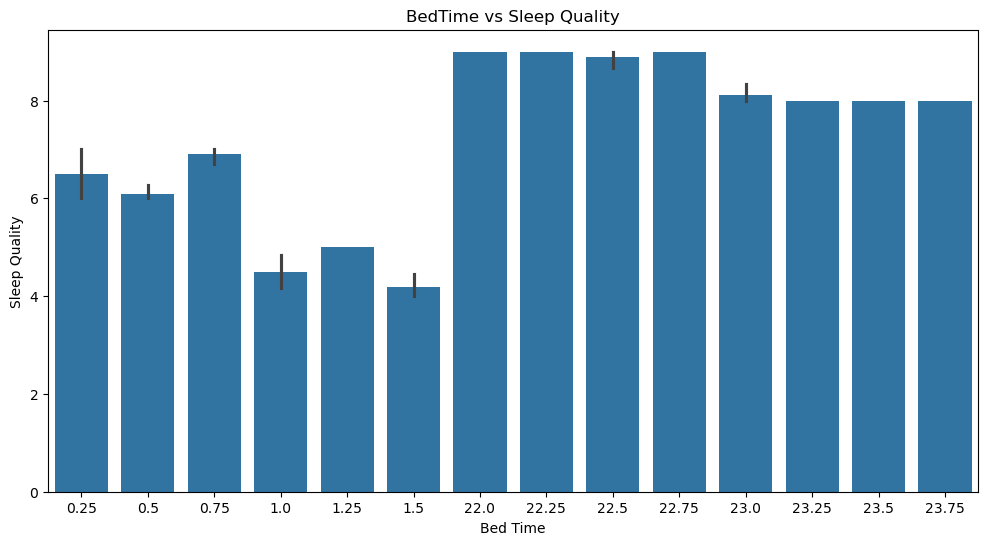

In [125]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Bedtime', y = 'Sleep Quality', data = df)
plt.xlabel("Bed Time")
plt.ylabel("Sleep Quality")
plt.title("BedTime vs Sleep Quality")
plt.show()

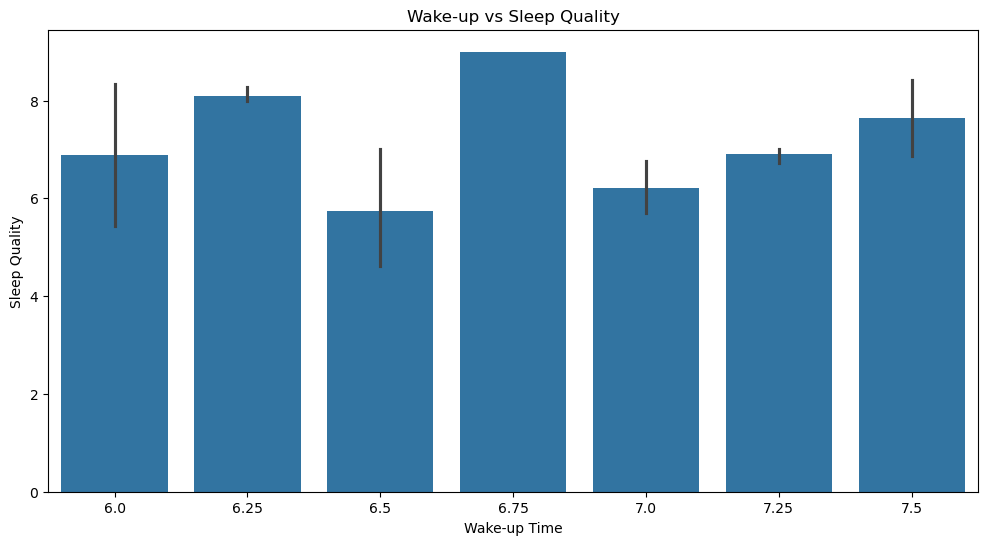

In [126]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Wake-up Time', y = 'Sleep Quality', data = df)
plt.xlabel("Wake-up Time")
plt.ylabel("Sleep Quality")
plt.title("Wake-up vs Sleep Quality")
plt.show()

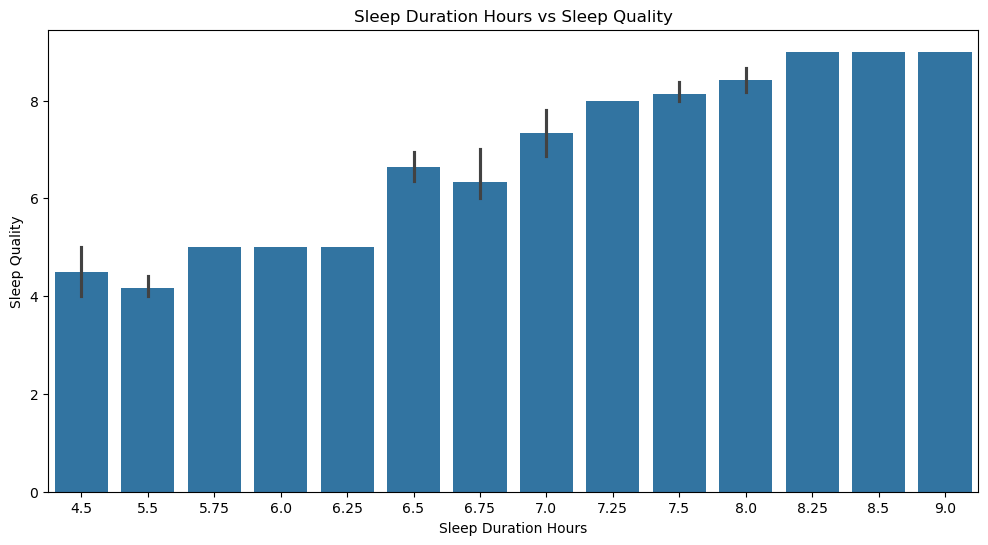

In [127]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df)
plt.xlabel("Sleep Duration Hours")
plt.ylabel("Sleep Quality")
plt.title("Sleep Duration Hours vs Sleep Quality")
plt.show()


Checking Linear Relationship between Sleep Time Hours & Sleep Quality

In [128]:
X = df[['Sleep Duration Hours']]
Y = df['Sleep Quality']

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

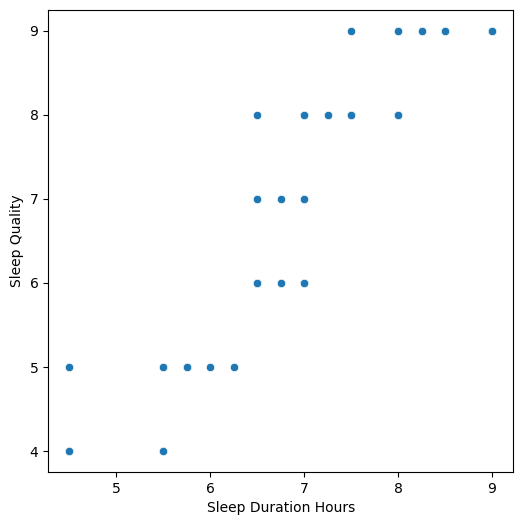

In [129]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df)
plt.show()

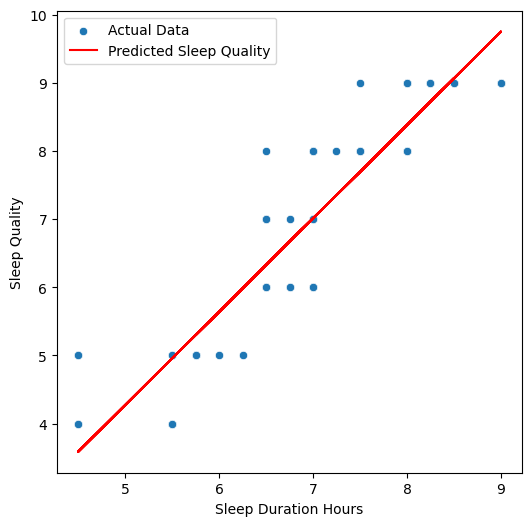

In [130]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df, label = 'Actual Data')
plt.plot(X, model.predict(X), color = 'red', label = 'Predicted Sleep Quality')
plt.legend()
plt.show()

In [131]:
from sklearn.metrics import r2_score
r2_score(Y, model.predict(X))

0.8443929044393099

Physical Activity vs Sleep Quality

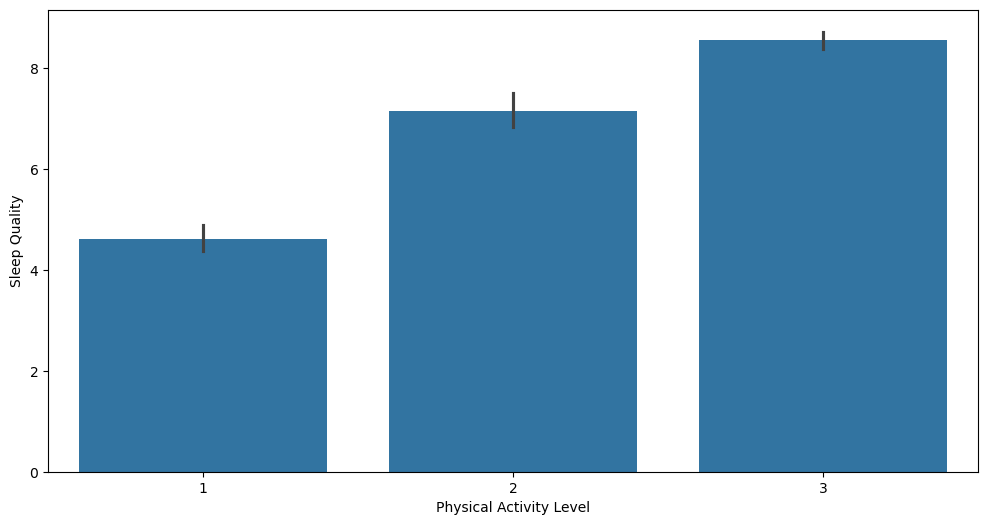

In [132]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Physical Activity Level', y = 'Sleep Quality', data = df)
plt.show()


Amount of calories vs Sleep Quality

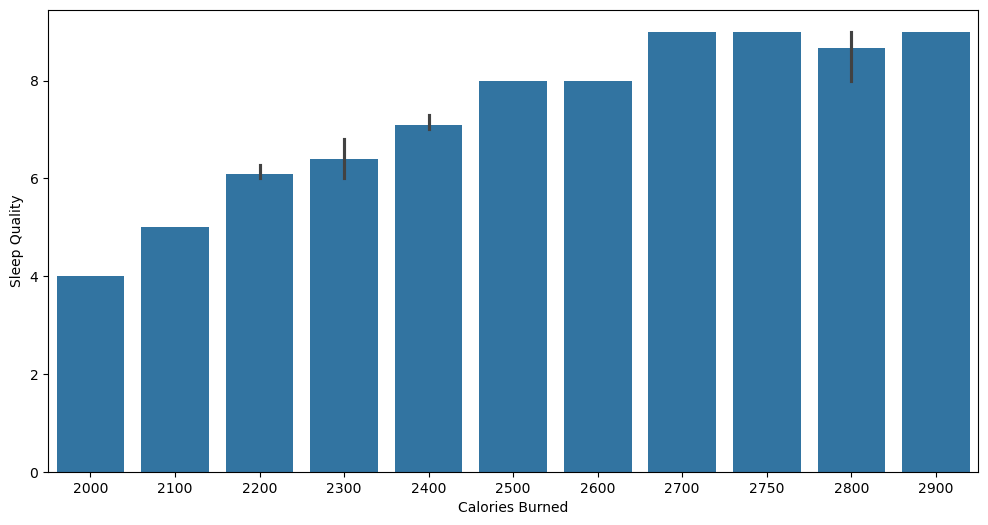

In [133]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.show()

In [134]:
model = LinearRegression()

X = df[['Calories Burned']]
Y = df['Sleep Quality']

model.fit(X, Y)

LinearRegression()

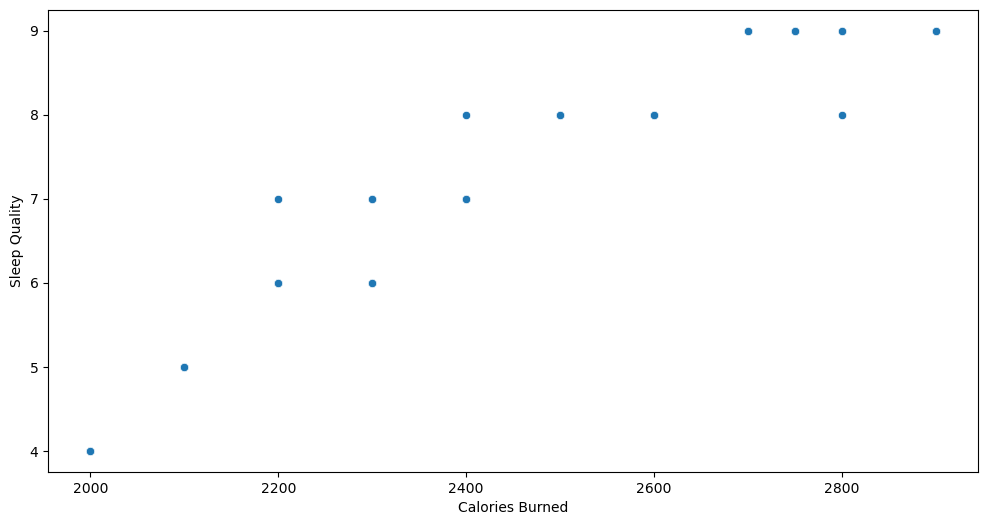

In [135]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.show()

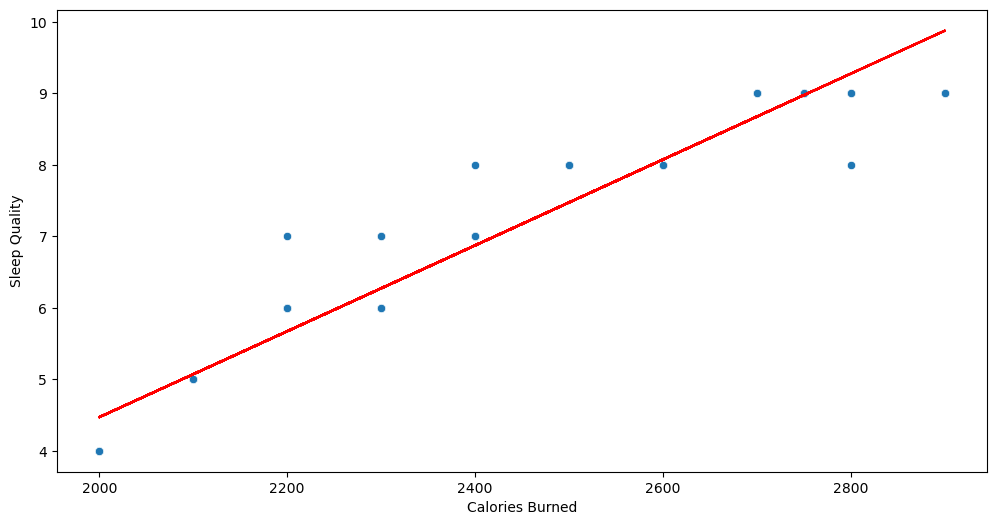

In [136]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.plot(X, model.predict(X), color = 'red')
plt.show()


In [137]:
r2_score(Y, model.predict(X))

0.9478131260919267

Impact of Dietary Habits on Sleep Quality

In [138]:
df['Dietary Habits'].value_counts()


Dietary Habits
unhealthy    41
medium       30
healthy      29
Name: count, dtype: int64

In [139]:
custom_codes = {'unhealthy': 1, 'medium': 2, 'healthy': 3}
df['Dietary Habits'] = df['Dietary Habits'].map(custom_codes)
df.head()


,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,3,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,1,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,3,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,1,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,2,no,no,7.5


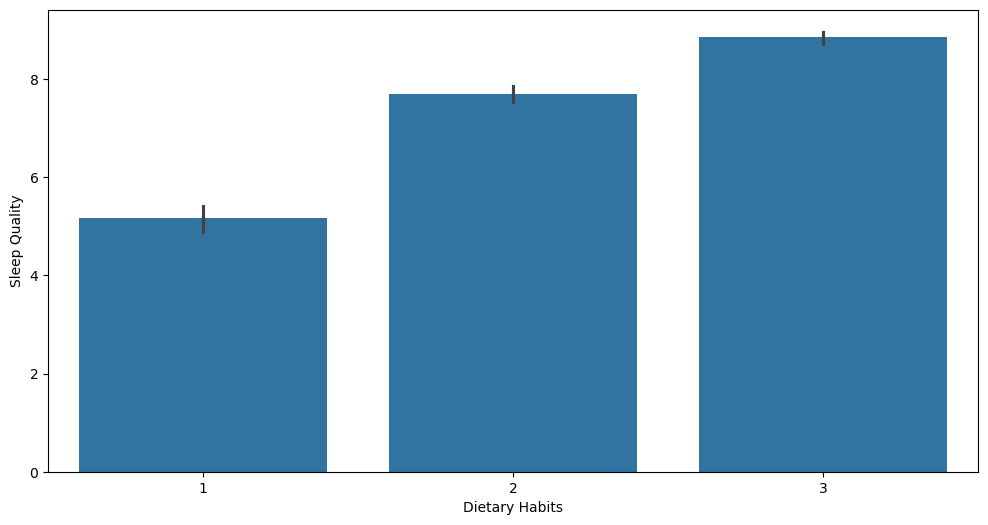

In [140]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Dietary Habits', y = 'Sleep Quality', data = df)
plt.show()

Sleep Disorder vs Sleep Quality

In [141]:
df['Sleep Disorders'].head()


0     no
1    yes
2     no
3    yes
4     no
Name: Sleep Disorders, dtype: object

In [142]:
sleep_disorder_sleep_quality_summary = df.groupby('Sleep Disorders').agg({
    'Sleep Quality': ['mean', 'std'],
    'Physical Activity Level': lambda x: x.value_counts().to_dict()
})
print(sleep_disorder_sleep_quality_summary)


                Sleep Quality           Physical Activity Level
                         mean       std                <lambda>
Sleep Disorders                                                
no                   7.837838  1.085736          {2: 38, 3: 36}
yes                  4.615385  0.697247                 {1: 26}


Sleep Disorder affect on Physical Activity

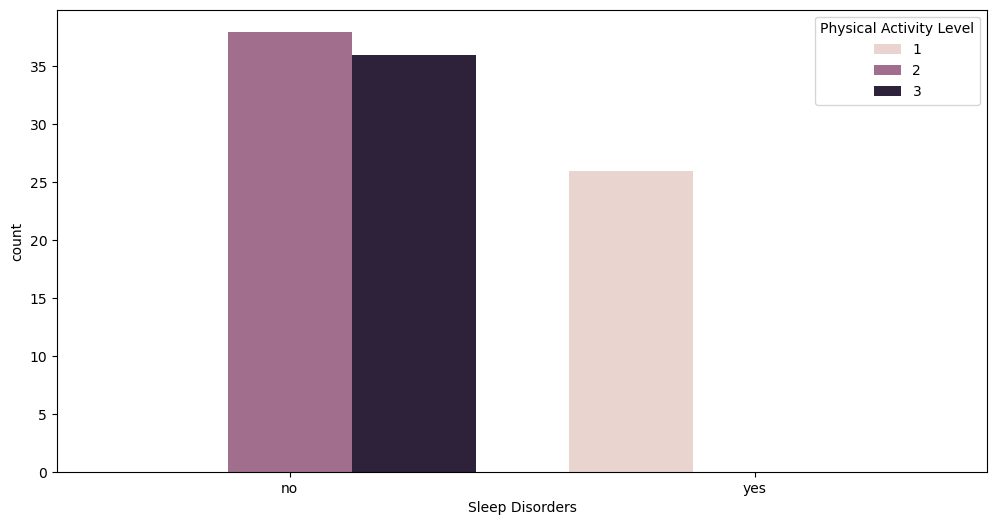

In [143]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Sleep Disorders', hue = 'Physical Activity Level', data = df)
plt.show()

Sleep Disorder vs Sleep Quality

Text(0, 0.5, 'Sleep Quality')

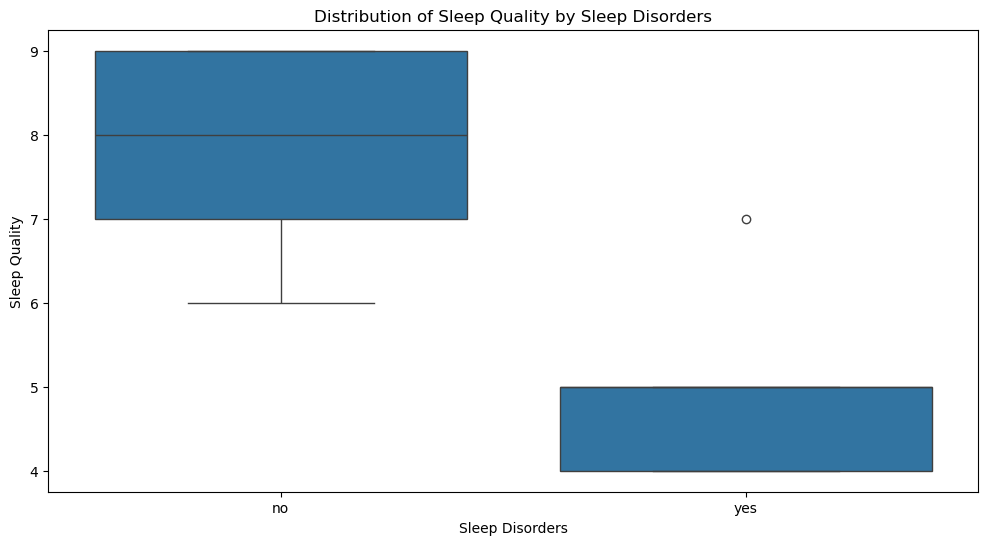

In [144]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sleep Disorders', y='Sleep Quality', data=df)
plt.title('Distribution of Sleep Quality by Sleep Disorders')
plt.xlabel('Sleep Disorders')
plt.ylabel('Sleep Quality')


In [145]:
yes_sleep_disorder_quality = df[df['Sleep Disorders'] == 'yes']['Sleep Quality']
no_sleep_disorder_quality =  df[df['Sleep Disorders'] == 'no']['Sleep Quality']

t_sleep_disorder_quality, p_sleep_disorder_quality = stats.ttest_ind(yes_sleep_disorder_quality, no_sleep_disorder_quality, nan_policy='omit')

In [146]:
print(f"t-sleep-disorder-quality : {t_sleep_disorder_quality:.2f}")
print(f"p-sleep-disorder-quality : {p_sleep_disorder_quality:.2f}")

t-sleep-disorder-quality : -14.12
p-sleep-disorder-quality : 0.00


Medication vs Sleep Quality

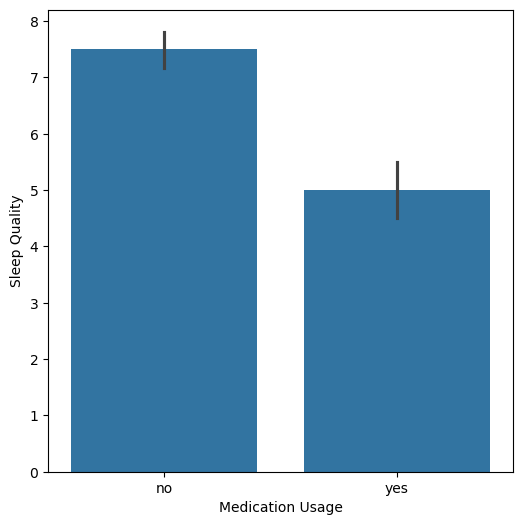

In [147]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'Medication Usage', y = 'Sleep Quality', data = df)
plt.show()

In [148]:
medication_quality = df[df['Medication Usage'] == 'yes']['Sleep Quality']
no_medication_quality = df[df['Medication Usage'] == 'no']['Sleep Quality']

t_statistic, p_value = stats.ttest_ind(medication_quality, no_medication_quality, equal_var=False)
print(f't-test Statistic for Sleep Quality: {t_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

t-test Statistic for Sleep Quality: -8.08
p-value: 0.0000


In [149]:
df_numerics = df.select_dtypes(include = ['number'])
corr = df_numerics.corr()

print(corr['Sleep Quality'].sort_values(ascending=False))

Sleep Quality              1.000000
Daily Steps                0.976277
Calories Burned            0.973557
Sleep Duration Hours       0.918909
Dietary Habits             0.902498
Physical Activity Level    0.875203
Bedtime                    0.853312
Wake-up Time              -0.048526
Age                       -0.848356
Name: Sleep Quality, dtype: float64


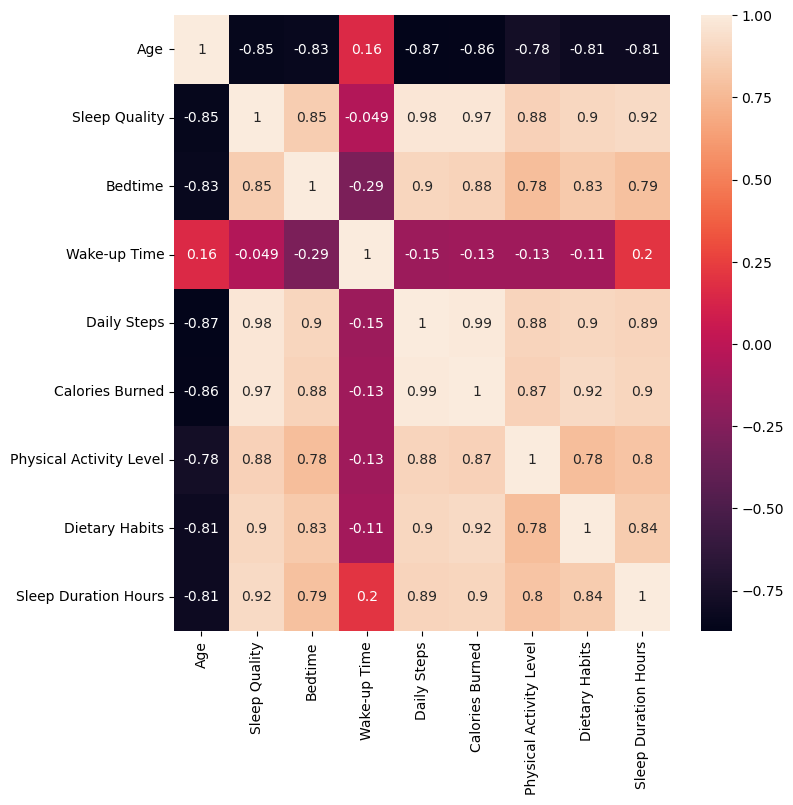

In [150]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)
plt.show()
